In [1]:
import pandas as pd
df = pd.read_excel("Bankruptcy.xlsx")
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [2]:
df.shape

(250, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [4]:
df.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

# Pre-Processing

In [5]:
df.duplicated().sum()

147

In [6]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['class']= label_encoder.fit_transform(df['class'])
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [8]:
df.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.225742,-0.074246,0.056011,-0.208575,0.152581,-0.217132
management_risk,0.225742,1.000000,-0.163226,-0.112473,-0.125335,0.089500,-0.188887
financial_flexibility,-0.074246,-0.163226,1.000000,0.397757,0.525996,-0.000401,0.624573
credibility,0.056011,-0.112473,0.397757,1.000000,0.524773,-0.110603,0.606350
competitiveness,-0.208575,-0.125335,0.525996,0.524773,1.000000,-0.052165,0.859809
operating_risk,0.152581,0.089500,-0.000401,-0.110603,-0.052165,1.000000,-0.136393
class,-0.217132,-0.188887,0.624573,0.606350,0.859809,-0.136393,1.000000


# Visualization

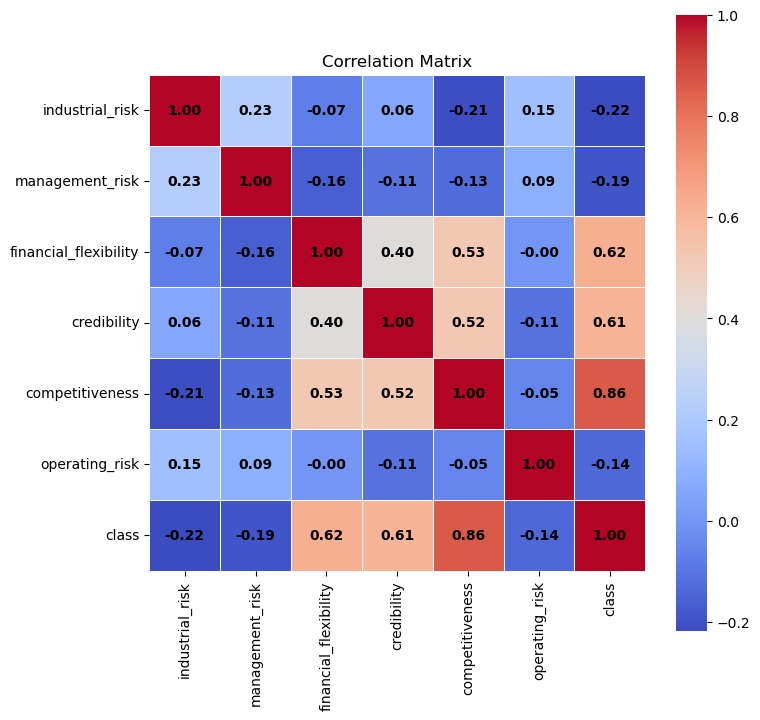

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(8, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, 
            annot_kws={"size": 10, "weight": "bold", "color": "Black"})  # Set annotation color to white
plt.title('Correlation Matrix')
plt.show()

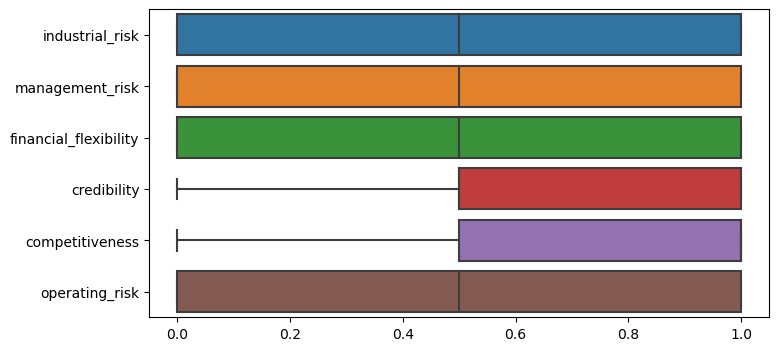

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude the 'class' column

df_excluded = df.drop(columns=['class'])
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_excluded, orient='h')
plt.show()

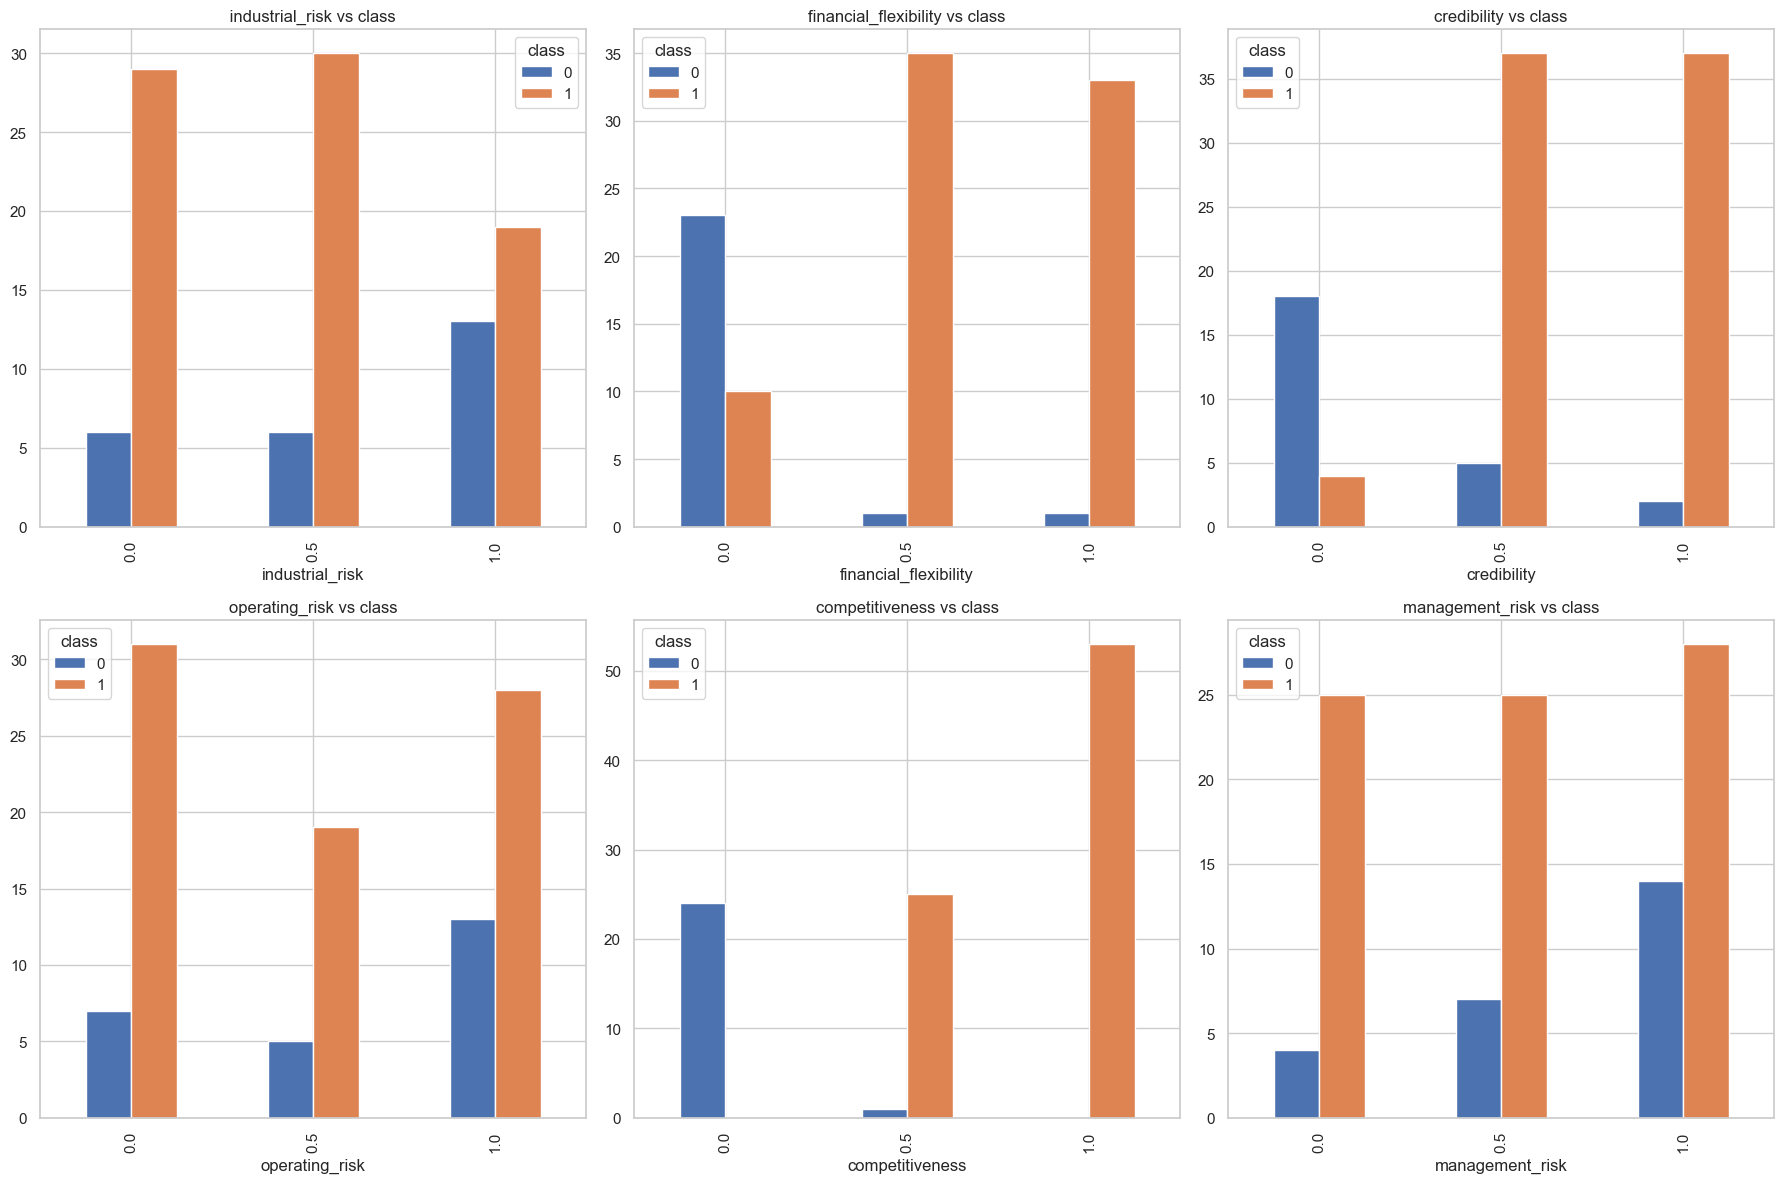

In [11]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2,3, figsize=(18, 12))

#industrial_risk vs class
pd.crosstab(df['industrial_risk'], df['class']).plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title(' industrial_risk vs class ')

#financial_flexibility vs class
pd.crosstab(df['financial_flexibility'], df['class']).plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('financial_flexibility vs class')

#credibility vs class
pd.crosstab(df['credibility'], df['class']).plot(kind='bar', ax=axes[0, 2])
axes[0, 2].set_title('credibility vs class')

#operating_risk vs class
pd.crosstab(df['operating_risk'], df['class']).plot(kind='bar', ax=axes[1, 0 ])
axes[1, 0].set_title('operating_risk vs class')

#competitiveness vs class
pd.crosstab(df['competitiveness'], df['class']).plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('competitiveness vs class')

#management_risk vs class
pd.crosstab(df['management_risk'], df['class']).plot(kind='bar', ax=axes[1, 2])
axes[1, 2].set_title('management_risk vs class')


plt.tight_layout()
plt.show()


# Basic model 

In [12]:
from sklearn.linear_model import LogisticRegression

X = df.drop(['class'], axis=1)  # Independent variables
y = df['class']  # Target variable

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Predict on the test data
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1])

In [14]:
import numpy as np
train_acc_logist = np.mean(model.predict(X_train)== y_train)
print("train_acc_logist:",train_acc_logist)
test_acc_logist = np.mean(model.predict(X_test)== y_test)
print("test_acc_logist:",test_acc_logist)

train_acc_logist: 0.9861111111111112
test_acc_logist: 0.967741935483871


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Calculate basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.97
Precision: 0.96
Recall: 1.00
F1 Score: 0.98
ROC-AUC Score: 1.00
Confusion Matrix:
[[ 7  1]
 [ 0 23]]


In [16]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

X = df.drop(['class'], axis=1)  # Independent variables
y = df['class']  # Target variable

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

# Calculate cross-validation scores
cv_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')  

# Print the results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Cross-Validation Accuracy Scores: [1.         0.95238095 1.         0.95       1.        ]
Mean Accuracy: 0.98 ± 0.02


# Feature selection

In [17]:
df1 = df.drop('class', axis=1)

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


# Standardize the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(df_scaled.values, i) for i in range(df_scaled.shape[1])]

# Display the VIF values
print(vif_data)


                 Feature       VIF
0        industrial_risk  1.173784
1        management_risk  1.088004
2  financial_flexibility  1.445276
3            credibility  1.512495
4        competitiveness  1.777002
5         operating_risk  1.047039


In [19]:
from sklearn.feature_selection import RFE

X = df.drop(['class'], axis=1)  # Remove the target variable
y = df['class']  # Target variable

# Initialize Logistic Regression model and RFE
rfe = RFE(model, n_features_to_select=3)  # Selects top 3 features

# Fit RFE
rfe.fit(X, y)

# Print the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features after RFE:", selected_features)


Selected Features after RFE: Index(['financial_flexibility', 'credibility', 'competitiveness'], dtype='object')


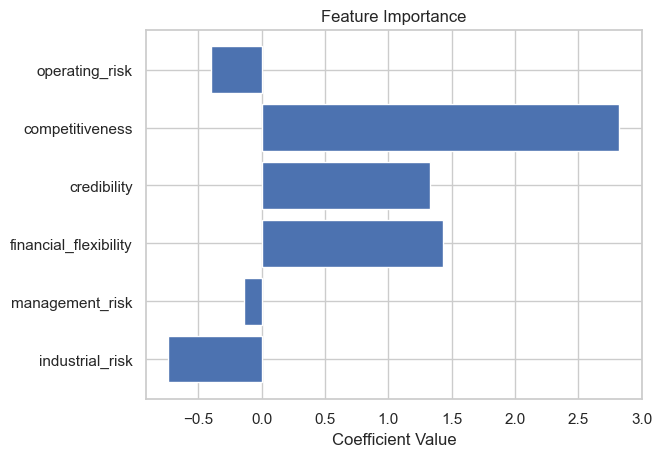

In [20]:
import matplotlib.pyplot as plt

# Get feature coefficients
coefficients = model.coef_[0]
feature_names = X.columns

# Plotting feature importances
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()


# Basic model after feature selection

In [21]:
X_selected = df[['credibility', 'financial_flexibility', 'competitiveness']]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

model.fit(X_selected, y)
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1])

In [22]:
import numpy as np
train_acc_logist = np.mean(model.predict(X_train)== y_train)
print("train_acc_logist:",train_acc_logist)
test_acc_logist = np.mean(model.predict(X_test)== y_test)
print("test_acc_logist:",test_acc_logist)

train_acc_logist: 0.9861111111111112
test_acc_logist: 1.0


In [23]:
# Calculate basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC Score: 1.00
Confusion Matrix:
[[ 8  0]
 [ 0 23]]


# Cross-Validation for Basic Model

In [24]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

X_selected = df[['credibility', 'financial_flexibility', 'competitiveness']]
y = df['class']

model = LogisticRegression()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

# Calculate cross-validation scores
cv_scores = cross_val_score(model, X_selected, y, cv=skf, scoring='accuracy')  # Change scoring as needed

# Print the results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Cross-Validation Accuracy Scores: [1.         0.95238095 1.         1.         1.        ]
Mean Accuracy: 0.99 ± 0.02


# LogisticRegression

In [25]:
X = df.drop(['class'], axis=1)  # Independent variables
y = df['class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

LR = LogisticRegression()
LR.fit(X_train, y_train)

# Predict on the test data
y_pred = LR.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1])

In [26]:
train_acc_log = np.mean(LR.predict(X_train)== y_train)
print("train_acc_log:",train_acc_log)
test_acc_log = np.mean(LR.predict(X_test)== y_test)
print("test_acc_log:",test_acc_log)

train_acc_log: 0.9861111111111112
test_acc_log: 0.967741935483871


In [27]:
# Calculate basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, LR.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.97
Precision: 0.96
Recall: 1.00
F1 Score: 0.98
ROC-AUC Score: 1.00
Confusion Matrix:
[[ 7  1]
 [ 0 23]]


In [28]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

X = df.drop(['class'], axis=1)  # Independent variables
y = df['class']  # Target variable

LR = LogisticRegression()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

# Calculate cross-validation scores
cv_scores = cross_val_score(LR, X, y, cv=skf, scoring='accuracy')  # Change scoring as needed

# Print the results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Cross-Validation Accuracy Scores: [1.         0.95238095 1.         0.95       1.        ]
Mean Accuracy: 0.98 ± 0.02


# Logistic Regression for selected features

In [29]:
X_selected = df[['credibility', 'financial_flexibility', 'competitiveness']]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

LR.fit(X_selected, y)
y_pred = LR.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1])

In [30]:
train_acc_log = np.mean(LR.predict(X_train)== y_train)
print("train_acc_log:",train_acc_log)
test_acc_log = np.mean(LR.predict(X_test)== y_test)
print("test_acc_log:",test_acc_log)

train_acc_log: 0.9861111111111112
test_acc_log: 1.0


In [31]:
# Calculate basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, LR.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC Score: 1.00
Confusion Matrix:
[[ 8  0]
 [ 0 23]]


In [32]:
X_selected = df[['credibility', 'financial_flexibility', 'competitiveness']]
y = df['class']

LR = LogisticRegression()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

# Calculate cross-validation scores
cv_scores = cross_val_score(LR, X_selected, y, cv=skf, scoring='accuracy')  # Change scoring as needed

# Print the results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Cross-Validation Accuracy Scores: [1.         0.95238095 1.         1.         1.        ]
Mean Accuracy: 0.99 ± 0.02


# KNearestNeighbor

In [33]:
from sklearn.neighbors import KNeighborsClassifier

X = df.drop(['class'], axis=1)  # Independent variables
y = df['class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k = 7 
# Train a KNN model
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1])

In [34]:
train_acc_Knn = np.mean(knn.predict(X_train)== y_train)
print("train_acc_Knn:",train_acc_Knn)
test_acc_Knn = np.mean(knn.predict(X_test)== y_test)
print("test_acc_Knn:",test_acc_Knn)

train_acc_Knn: 0.9861111111111112
test_acc_Knn: 1.0


In [35]:
# Calculate basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC Score: 1.00
Confusion Matrix:
[[ 8  0]
 [ 0 23]]


In [36]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

X = df.drop(['class'], axis=1)  # Independent variables
y = df['class']  # Target variable


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

# Calculate cross-validation scores
cv_scores = cross_val_score(knn, X, y, cv=skf, scoring='accuracy')  # Change scoring as needed

# Print the results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Cross-Validation Accuracy Scores: [1.         0.95238095 1.         1.         1.        ]
Mean Accuracy: 0.99 ± 0.02


# KNN for Selected features

In [37]:
X_selected = df[['financial_flexibility','credibility', 'competitiveness']]
y = df['class'] 

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1])

In [38]:
train_acc_Knn = np.mean(knn.predict(X_train)== y_train)
print("train_acc_Knn:",train_acc_Knn)
test_acc_Knn = np.mean(knn.predict(X_test)== y_test)
print("test_acc_Knn:",test_acc_Knn)

train_acc_Knn: 0.9861111111111112
test_acc_Knn: 1.0


In [39]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Model Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[ 8  0]
 [ 0 23]]


In [40]:
X_selected = df[['financial_flexibility','credibility', 'competitiveness']]
y = df['class'] 

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

# Calculate cross-validation scores
cv_scores = cross_val_score(knn, X_selected, y, cv=skf, scoring='accuracy')  # Change scoring as needed

# Print the results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Cross-Validation Accuracy Scores: [1.         0.95238095 1.         1.         1.        ]
Mean Accuracy: 0.99 ± 0.02


# GaussianNB

In [41]:
from sklearn.naive_bayes import GaussianNB

X = df.drop(['class'], axis=1)  # Independent variables
y = df['class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1])

In [42]:
train_acc_gnb = np.mean(gnb.predict(X_train)== y_train)
print("train_acc_Knn:",train_acc_Knn)
test_acc_gnb = np.mean(gnb.predict(X_test)== y_test)
print("test_acc_gnb:",test_acc_gnb)

train_acc_Knn: 0.9861111111111112
test_acc_gnb: 0.967741935483871


In [43]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Model Performance:
Accuracy: 0.97
Precision: 0.96
Recall: 1.00
F1 Score: 0.98
Confusion Matrix:
[[ 7  1]
 [ 0 23]]


In [44]:
X = df.drop(['class'], axis=1)  # Independent variables
y = df['class']  # Target variable

# Set up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

# Calculate cross-validation scores
cv_scores = cross_val_score(gnb, X, y, cv=skf, scoring='accuracy')  

# Print the results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Cross-Validation Accuracy Scores: [1.         0.95238095 1.         0.95       1.        ]
Mean Accuracy: 0.98 ± 0.02


# GNB for Selected features

In [45]:
X_selected = df[['financial_flexibility','credibility', 'competitiveness']]
y = df['class'] 

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1])

In [46]:
train_acc_gnb = np.mean(gnb.predict(X_train)== y_train)
print("train_acc_Knn:",train_acc_Knn)
test_acc_gnb = np.mean(gnb.predict(X_test)== y_test)
print("test_acc_gnb:",test_acc_gnb)

train_acc_Knn: 0.9861111111111112
test_acc_gnb: 0.967741935483871


In [47]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Model Performance:
Accuracy: 0.97
Precision: 0.96
Recall: 1.00
F1 Score: 0.98
Confusion Matrix:
[[ 7  1]
 [ 0 23]]


In [48]:
X_selected = df[['financial_flexibility','credibility', 'competitiveness']]
y = df['class'] 


# Initialize the SVM model

# Set up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

# Calculate cross-validation scores
cv_scores = cross_val_score(gnb, X_selected, y, cv=skf, scoring='accuracy')  

# Print the results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Cross-Validation Accuracy Scores: [1.         0.95238095 1.         0.95       1.        ]
Mean Accuracy: 0.98 ± 0.02


# Support Vector Machine

In [49]:
from sklearn.svm import SVC

X = df.drop(['class'], axis=1)  # Independent variables
y = df['class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM model
svm = SVC(kernel='linear')  

svm.fit(X_train, y_train)

# Predict on the test data
y_pred = svm.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1])

In [50]:
train_acc_svm = np.mean(svm.predict(X_train)== y_train)
print("train_acc_svm:",train_acc_svm)
test_acc_svm = np.mean(svm.predict(X_test)== y_test)
print("test_acc_svm:",test_acc_svm)

train_acc_svm: 0.9861111111111112
test_acc_svm: 0.967741935483871


In [51]:
# Calculate basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.97
Precision: 0.96
Recall: 1.00
F1 Score: 0.98
Confusion Matrix:
[[ 7  1]
 [ 0 23]]


In [52]:
X = df.drop(['class'], axis=1)  # Independent variables
y = df['class']  # Target variable


# Set up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

# Calculate cross-validation scores
cv_scores = cross_val_score(svm, X, y, cv=skf, scoring='accuracy')  # Change scoring as needed

# Print the results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Cross-Validation Accuracy Scores: [1.         0.95238095 1.         0.95       1.        ]
Mean Accuracy: 0.98 ± 0.02


# SVM for Selected features

In [53]:
X_selected = df[['financial_flexibility','credibility', 'competitiveness']]
y = df['class'] 

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1])

In [54]:
train_acc_svm = np.mean(svm.predict(X_train)== y_train)
print("train_acc_svm:",train_acc_svm)
test_acc_svm = np.mean(svm.predict(X_test)== y_test)
print("test_acc_svm:",test_acc_svm)

train_acc_svm: 0.9861111111111112
test_acc_svm: 0.967741935483871


In [55]:
# Calculate basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.97
Precision: 0.96
Recall: 1.00
F1 Score: 0.98
Confusion Matrix:
[[ 7  1]
 [ 0 23]]


In [56]:
X_selected = df[['financial_flexibility','credibility', 'competitiveness']]
y = df['class'] 


# Set up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

# Calculate cross-validation scores
cv_scores = cross_val_score(svm, X_selected, y, cv=skf, scoring='accuracy')  # Change scoring as needed

# Print the results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Cross-Validation Accuracy Scores: [1.         0.95238095 1.         0.95       1.        ]
Mean Accuracy: 0.98 ± 0.02


# Comparison of Models 

In [57]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

y_test = [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1]
y_pred1 = [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,0, 1, 1, 1, 0, 1, 1, 0, 1]  # LR Predictions
y_pred2 = [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,0, 1, 1, 1, 0, 1, 1, 0, 1]  # KNN Predictions
y_pred3 = [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,0, 1, 1, 1, 0, 1, 1, 0, 1]  # GNB Predictions
y_pred4 = [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,0, 1, 1, 1, 0, 1, 1, 0, 1]  # SVM Predictions

# List of models predictions
model_predictions = [y_pred1, y_pred2, y_pred3, y_pred4]
model_names = ["LR", "KNN", "GNB", "SVM"]

# Initialize an empty list to store the metrics for each model
metrics_list = []

# Calculate metrics for each model and store in the list
for i, y_pred in enumerate(model_predictions):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store the metrics in a dictionary
    metrics_dict = {
        "Model": model_names[i],
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC Score": roc_auc,
        "Confusion Matrix": conf_matrix
    }

    # Append the dictionary to the list
    metrics_list.append(metrics_dict)

# Convert the list of dictionaries into a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display the DataFrame
print(metrics_df)


  Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC Score  \
0    LR  1.000000   1.000000     1.0  1.000000         1.0000   
1   KNN  1.000000   1.000000     1.0  1.000000         1.0000   
2   GNB  0.967742   0.958333     1.0  0.978723         0.9375   
3   SVM  0.967742   0.958333     1.0  0.978723         0.9375   

    Confusion Matrix  
0  [[8, 0], [0, 23]]  
1  [[8, 0], [0, 23]]  
2  [[7, 1], [0, 23]]  
3  [[7, 1], [0, 23]]  


In [58]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


X_selected = df[['financial_flexibility','credibility', 'competitiveness']]
y = df['class'] 

# Define Models
models = {
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True),
    'Logistic Regression':LogisticRegression(),
    'KNN': KNeighborsClassifier()
}

# Create Stratified K-Folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the results dictionary to collect metrics
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC-AUC Score': []
}

# Perform cross-validation for each model
for model_name, model in models.items():
    acc_scores = cross_val_score(model, X_selected, y, cv=skf, scoring='accuracy')
    precision_scores = cross_val_score(model, X_selected, y, cv=skf, scoring='precision')
    recall_scores = cross_val_score(model, X_selected, y, cv=skf, scoring='recall')
    f1_scores = cross_val_score(model, X_selected, y, cv=skf, scoring='f1')
    roc_auc_scores = cross_val_score(model, X_selected, y, cv=skf, scoring='roc_auc')

    # Store the average of the metrics
    results['Model'].append(model_name)
    results['Accuracy'].append(acc_scores.mean())
    results['Precision'].append(precision_scores.mean())
    results['Recall'].append(recall_scores.mean())
    results['F1 Score'].append(f1_scores.mean())
    results['ROC-AUC Score'].append(roc_auc_scores.mean())

# Convert the results dictionary into a DataFrame
results_df = pd.DataFrame(results)

# Display the final results table
print(results_df)


                 Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC Score
0          Naive Bayes  0.980476   0.975735     1.0  0.987488         0.9775
1                  SVM  0.980476   0.975735     1.0  0.987488         1.0000
2  Logistic Regression  0.990476   0.988235     1.0  0.993939         1.0000
3                  KNN  0.990476   0.988235     1.0  0.993939         0.9800


# Visualization of comparison

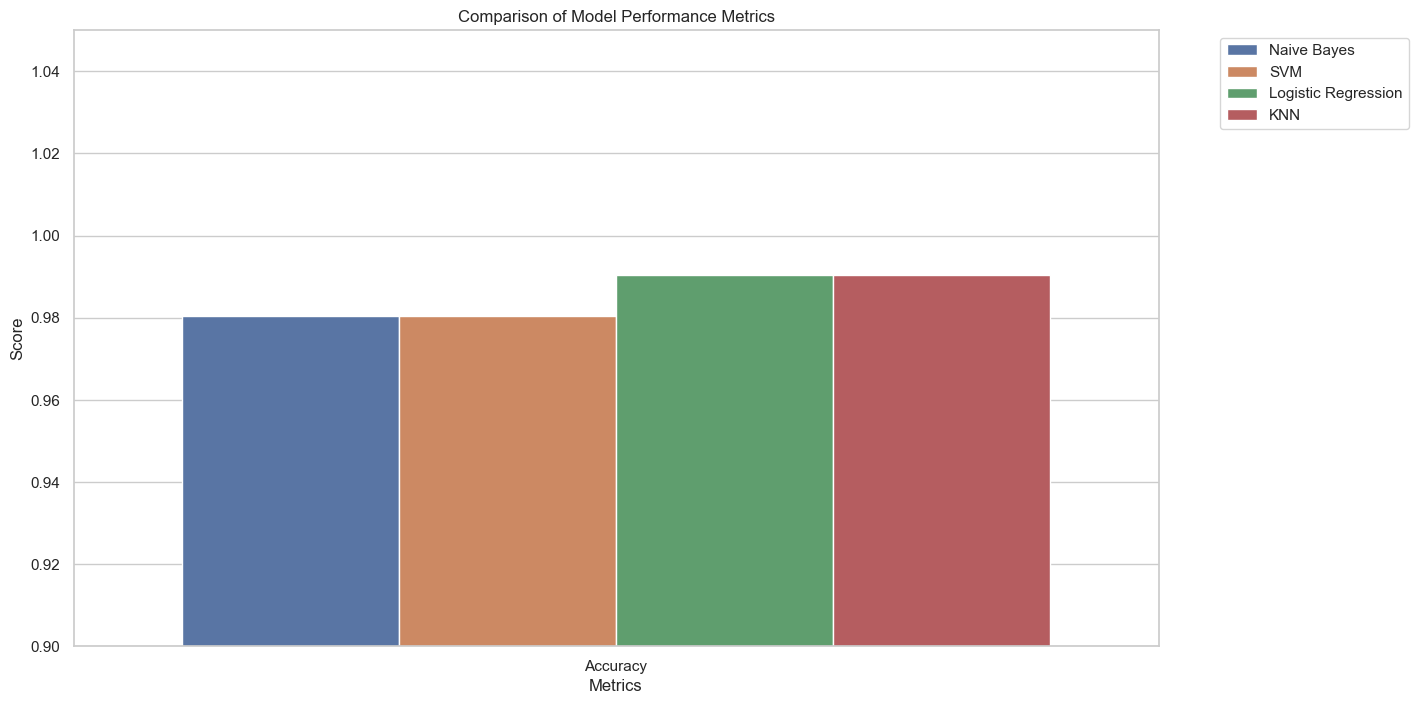

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'SVM', 'Logistic Regression', 'KNN'],
    'Accuracy': [0.980476, 0.980476, 0.990476, 0.990476],
    #'Precision': [0.975735, 0.975735, 0.988235, 0.988235],
    #'Recall': [1.0, 1.0, 1.0, 1.0],
    #'F1 Score': [0.987488, 0.987488, 0.993939, 0.993939],
    #'ROC-AUC Score': [0.9775, 1.0000, 1.0000, 0.9800]
})

# Set the figure size and style
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Melt the DataFrame for easier plotting with Seaborn
melted_df = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Create a grouped bar plot
sns.barplot(x='Metric', y='Score', hue='Model', data=melted_df)
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Positioning the legend outside the plot
plt.ylim(0.9, 1.05)  # Adjust y-axis limits to focus on the performance range
plt.show()


# HyperParameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_selected = df[['financial_flexibility','credibility', 'competitiveness']]
y = df['class'] 


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Define the model
model = SVC()

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],     # Regularization parameter
    'kernel': ['linear', 'rbf'], # Kernel type
    'gamma': ['scale', 'auto']   # Kernel coefficient
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the Grid Search model
grid_search.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Get the best model from Grid Search
best_svm = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_svm.predict(X_test)

# Print performance metrics
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.967741935483871

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.96      1.00      0.98        23

    accuracy                           0.97        31
   macro avg       0.98      0.94      0.96        31
weighted avg       0.97      0.97      0.97        31


Confusion Matrix:
 [[ 7  1]
 [ 0 23]]


# Conclusion 

### From this we can conclude that, the variables competitiveness,Financial Flexibity and Credibility has high influence. And Logistic Regression and KNN models has high accuracy.

# Dashboard

In [61]:
pip install explainerdashboard

Note: you may need to restart the kernel to use updated packages.


In [61]:
from explainerdashboard import ClassifierExplainer, RegressionExplainer

explainer = ClassifierExplainer(knn, X_test, y_test)

Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')


In [62]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

explainer = ClassifierExplainer(knn, X_test, y_test)

# Run the ExplainerDashboard on localhost and port 8051
ExplainerDashboard(explainer).run(port=805, host="127.0.0.1")


Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


  0%|          | 0/31 [00:00<?, ?it/s]

Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://192.168.55.105:805
